In [2]:
# load the data
import pandas as pd
import numpy as np

data_train = pd.read_csv('T-R-train.csv')
data_train

,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74
5,54.18,2.80
6,56.19,2.88
7,58.58,2.92
8,61.37,2.96
9,63.34,2.95


In [3]:
# define X and y
X_train = data_train.loc[:, 'T']
y_train = data_train.loc[:, 'rate']

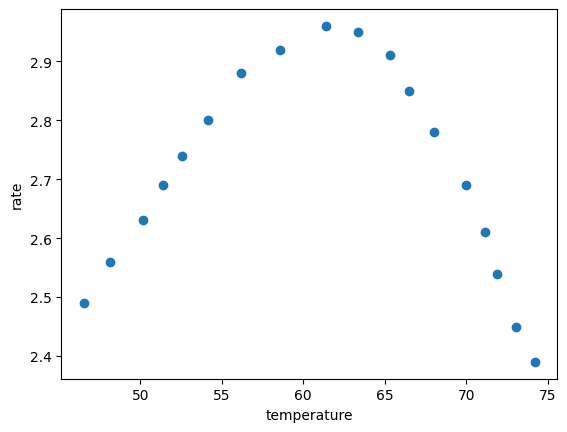

In [4]:
# visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X_train, y_train)
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [5]:
# establish linear regression model prediction
from sklearn.linear_model import LinearRegression
X_train = np.array(X_train).reshape(-1, 1)
lr1 = LinearRegression()
lr1.fit(X_train, y_train)

LinearRegression()

In [6]:
# load the data
data_test = pd.read_csv('T-R-test.csv')
X_test = data_test.loc[:, 'T']
y_test = data_test.loc[:, 'rate']

X_test = np.array(X_test).reshape(-1, 1)

In [7]:
# make prediction on the training and testing data
y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)

from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)
print('training r2: ', r2_train)
print('test r2: ', r2_test)

training r2:  0.016665703886981964
test r2:  -0.758336343735132


In [8]:
# generate new data
X_range = np.linspace(40, 90, 300).reshape(-1, 1)
y_range_predict = lr1.predict(X_range)

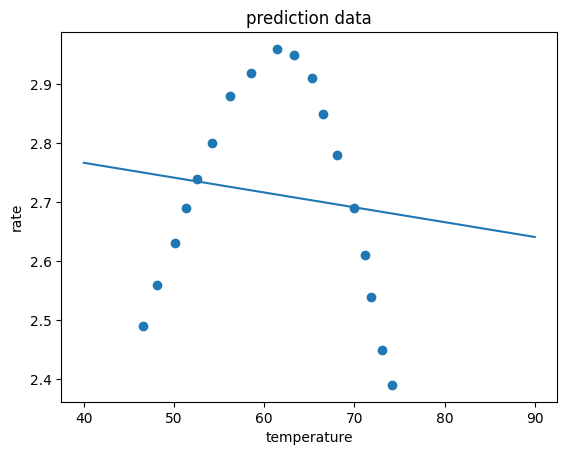

In [11]:
# visualize data
# 可以发现上面的线性模型结果很差劲
fig2 = plt.figure()
plt.plot(X_range, y_range_predict)
plt.scatter(X_train, y_train)
plt.title('prediction data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [14]:
# 接下来查看多项式的模型
# generate new features
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)
print(X_2_train)

[[1.0000000e+00 4.6530000e+01 2.1650409e+03]
 [1.0000000e+00 4.8140000e+01 2.3174596e+03]
 [1.0000000e+00 5.0150000e+01 2.5150225e+03]
 [1.0000000e+00 5.1360000e+01 2.6378496e+03]
 [1.0000000e+00 5.2570000e+01 2.7636049e+03]
 [1.0000000e+00 5.4180000e+01 2.9354724e+03]
 [1.0000000e+00 5.6190000e+01 3.1573161e+03]
 [1.0000000e+00 5.8580000e+01 3.4316164e+03]
 [1.0000000e+00 6.1370000e+01 3.7662769e+03]
 [1.0000000e+00 6.3340000e+01 4.0119556e+03]
 [1.0000000e+00 6.5310000e+01 4.2653961e+03]
 [1.0000000e+00 6.6470000e+01 4.4182609e+03]
 [1.0000000e+00 6.8030000e+01 4.6280809e+03]
 [1.0000000e+00 6.9970000e+01 4.8958009e+03]
 [1.0000000e+00 7.1130000e+01 5.0594769e+03]
 [1.0000000e+00 7.1890000e+01 5.1681721e+03]
 [1.0000000e+00 7.3050000e+01 5.3363025e+03]
 [1.0000000e+00 7.4210000e+01 5.5071241e+03]]


In [15]:
lr2 = LinearRegression()
lr2.fit(X_2_train, y_train)

y_2_train_predict = lr2.predict(X_2_train)
y_2_test_predict = lr2.predict(X_2_test)
r2_2_train = r2_score(y_train, y_2_train_predict)
r2_2_test = r2_score(y_test, y_2_test_predict)
print('training r2: ', r2_2_train)
print('test r2: ', r2_2_test)

training r2:  0.970051540068942
test r2:  0.9963954556468684


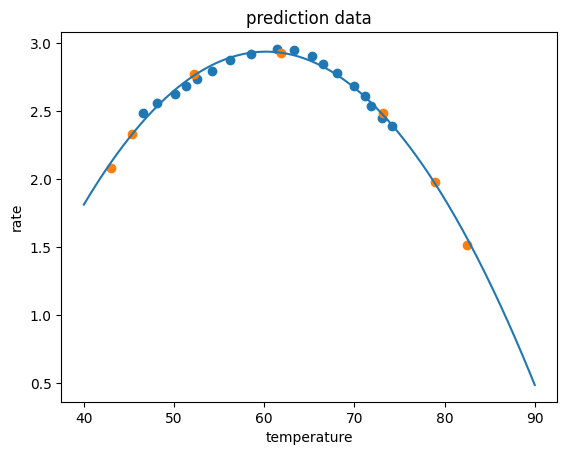

In [27]:
# generate new data
X_2_range = np.linspace(40, 90, 300).reshape(-1, 1)
X_2_range = poly2.transform(X_2_range)
y_2_range_predict = lr2.predict(X_2_range)

fig3 = plt.figure()
plt.plot(X_range, y_2_range_predict)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.title('prediction data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [25]:
# 5阶
poly5 = PolynomialFeatures(degree=5)
X_5_train = poly5.fit_transform(X_train)
X_5_test = poly5.transform(X_test)

In [23]:
lr5 = LinearRegression()
lr5.fit(X_5_train, y_train)

y_5_train_predict = lr5.predict(X_5_train)
y_5_test_predict = lr5.predict(X_5_test)
r2_5_train = r2_score(y_train, y_5_train_predict)
r2_5_test = r2_score(y_test, y_5_test_predict)
print('training r2: ', r2_5_train)
print('test r2: ', r2_5_test)

training r2:  0.9978527267187658
test r2:  0.5437837627379174


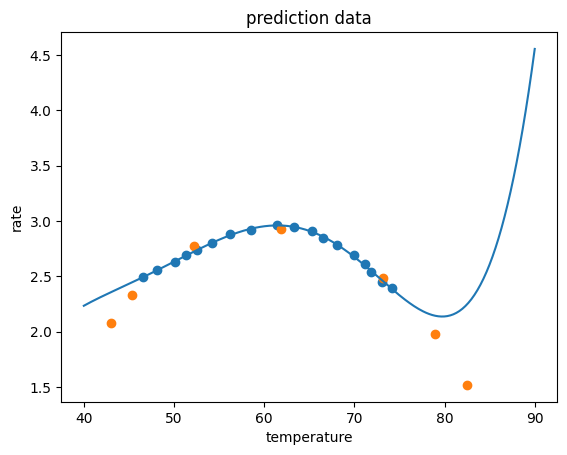

In [26]:
# generate new data
X_5_range = np.linspace(40, 90, 300).reshape(-1, 1)
X_5_range = poly5.transform(X_5_range)
y_5_range_predict = lr5.predict(X_5_range)

fig4 = plt.figure()
plt.plot(X_range, y_5_range_predict)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.title('prediction data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()